# 📊 Optimal Portfolio Allocation

In [1]:
from load_data import load_data,plot_insight,plot_distribution
from optimization import mvp,MaxSharpe,Max_util,RtnPerRisk,plot_port,expand_weights,active
from Shrinkage import shrinkage_mean_return
from GBM import GBM_simulation
from rubust_mean_cov import campbell_robust_est

## Data Processing

c:\Users\Lenovo\Desktop\MyFiles\FinTechProjects\Optimal_Portfolio_Allocation\load_data.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_list, start="2025-09-01", interval="1d")
[*********************100%***********************]  6 of 6 completed


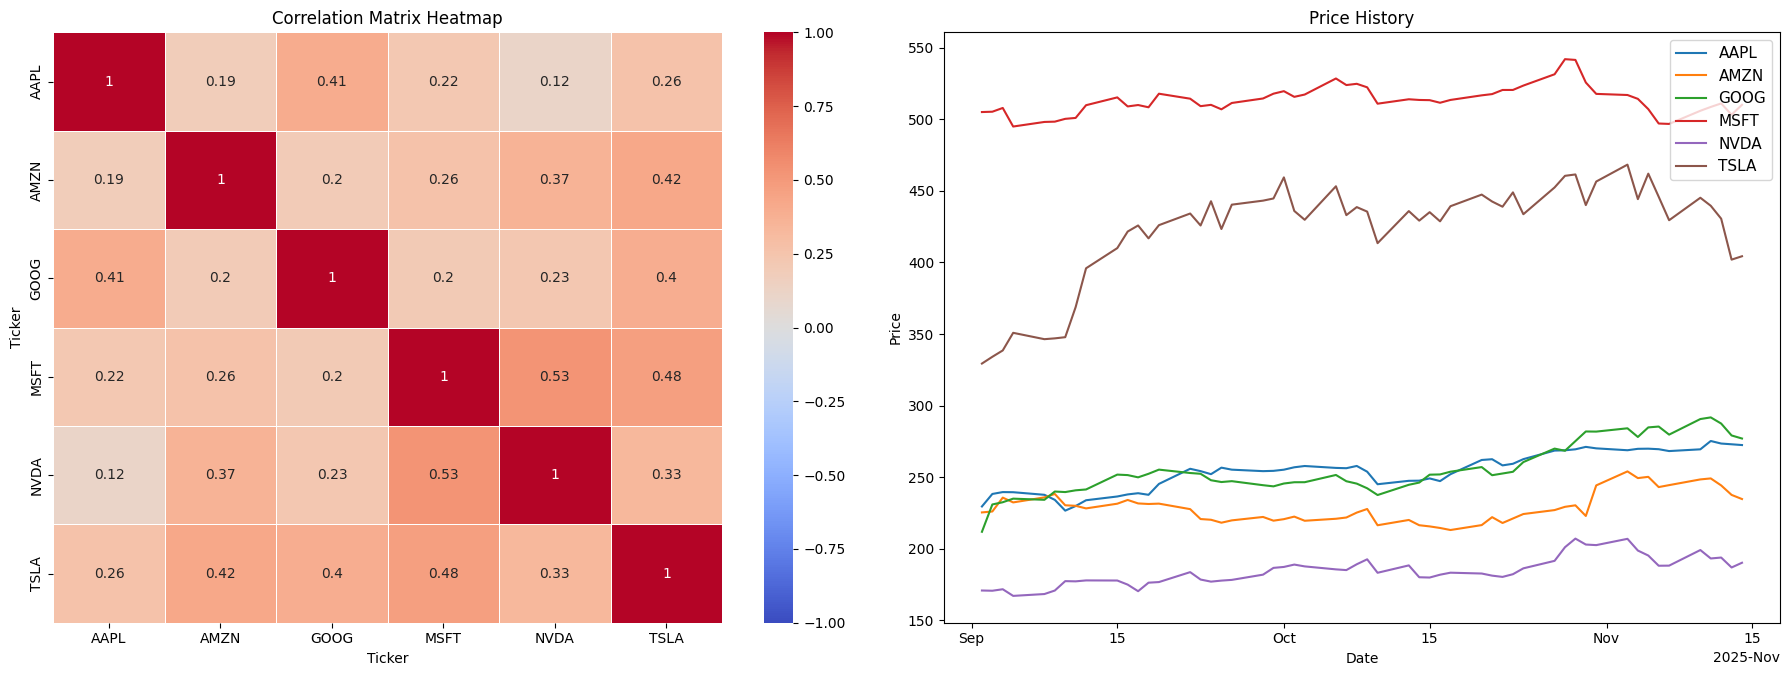

In [2]:
stock_list = ["NVDA", "AAPL", "MSFT", "GOOG", "TSLA", "AMZN"]
rtn, prices = load_data(stock_list)
mean_rtn = rtn.mean().to_numpy()
cov_m = rtn.cov().to_numpy()
cor_m = rtn.corr()
plot_insight(cor_m,prices)

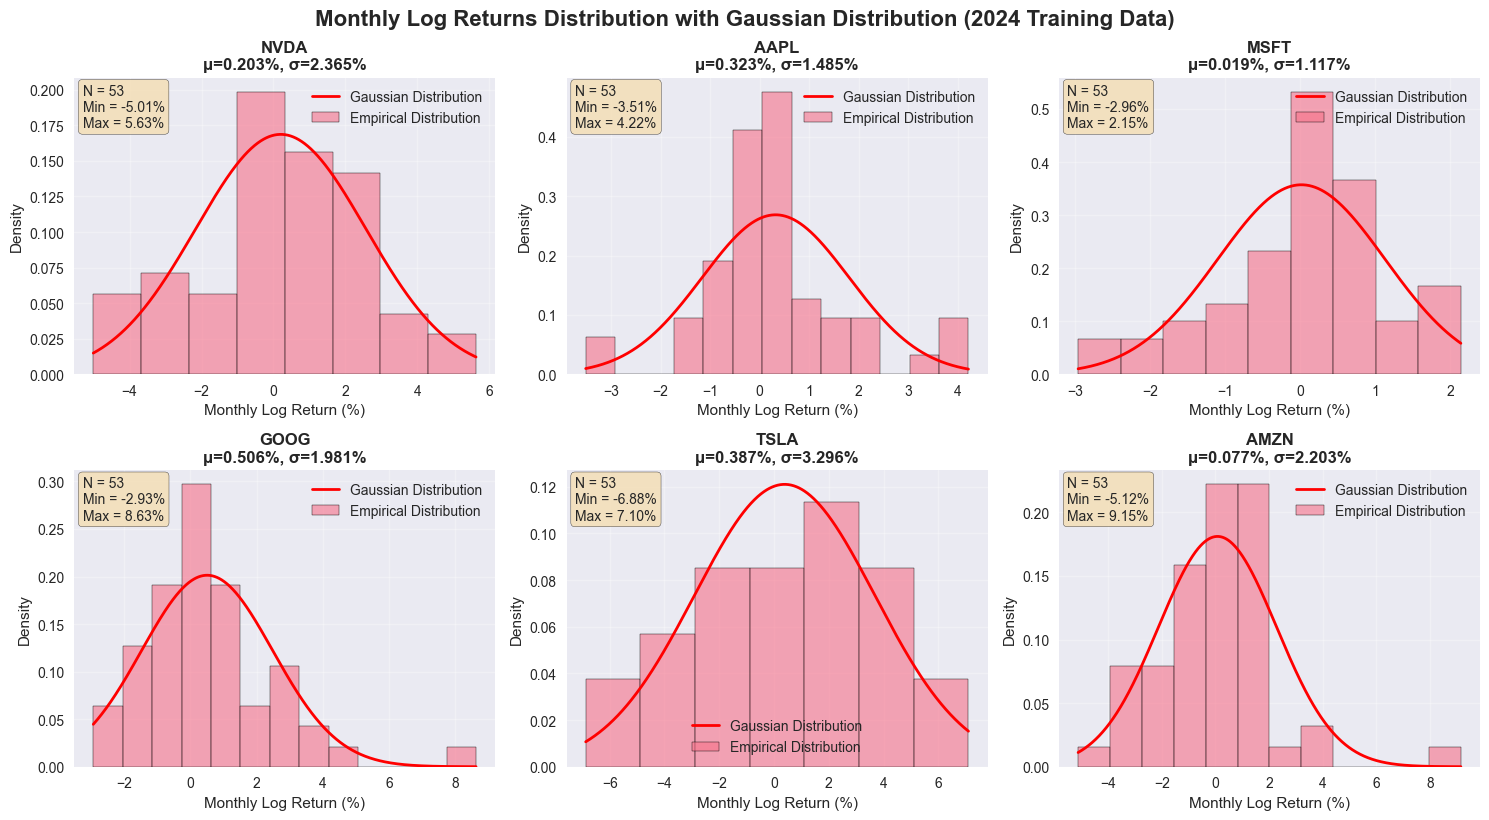

In [3]:
mean_rtn, cov_m = campbell_robust_est(rtn, b1 = 2, b2 = 1.24)
plot_distribution(rtn,stock_list)

## Construct Portfolio And Back-Testing

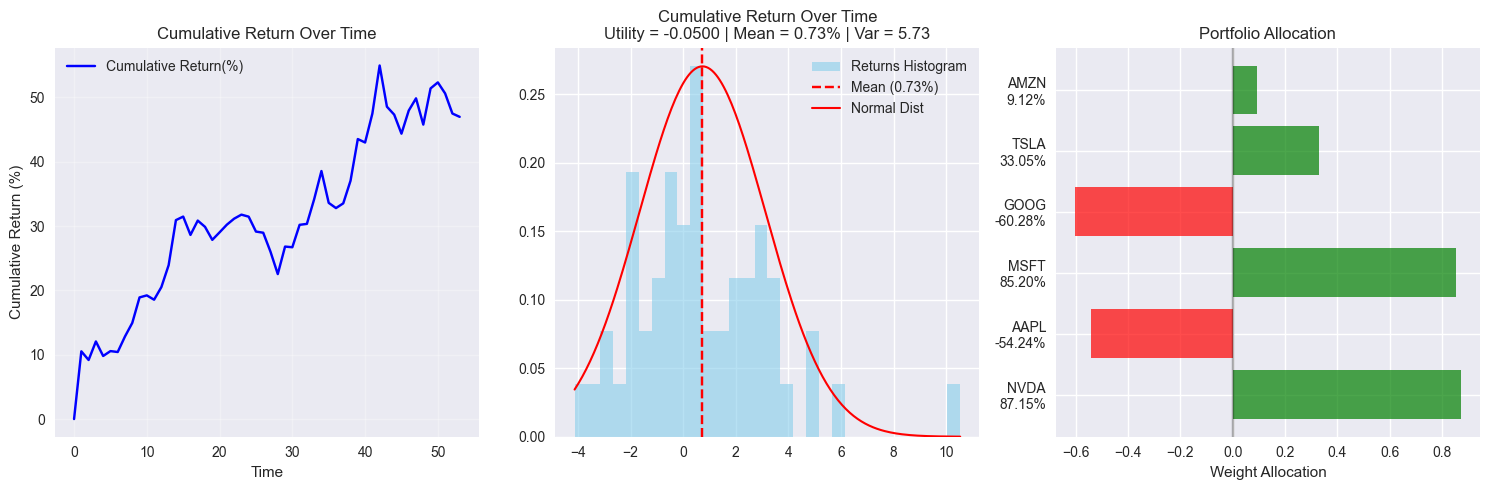

In [ ]:
alg = 4
A = 200
r = 0.045
r_daily = r/252
target_return = 0.005
Shrinkage = True

# ["NVDA", "AAPL", "MSFT","GOOG","TSLA","AMZN"]
short_res = [1, 1, 1, 1, 1, 1]
if Shrinkage:
    shrinkage_mean = shrinkage_mean_return(rtn,stock_list)
    mean_rtn_active = shrinkage_mean
mean_rtn_active,cov_m_active = active(short_res,mean_rtn,cov_m)

match alg:
    case 1:
        w = Max_util(mean_rtn_active, cov_m_active, A)
    case 2:
        w = mvp(mean_rtn_active,cov_m_active,target_return=target_return)
    case 3:
        w = mvp(mean_rtn_active,cov_m_active)
    case 4:
        w = MaxSharpe(mean_rtn_active,cov_m_active,r_daily)
    case _:
        w = RtnPerRisk(mean_rtn_active,cov_m_active)
w = expand_weights(w, short_res)

# Shrinked mean return only works for MVP
mu_port,sigma_port=plot_port(w, mean_rtn, cov_m,rtn,stock_list,A)


## Geometric Brownian Motions

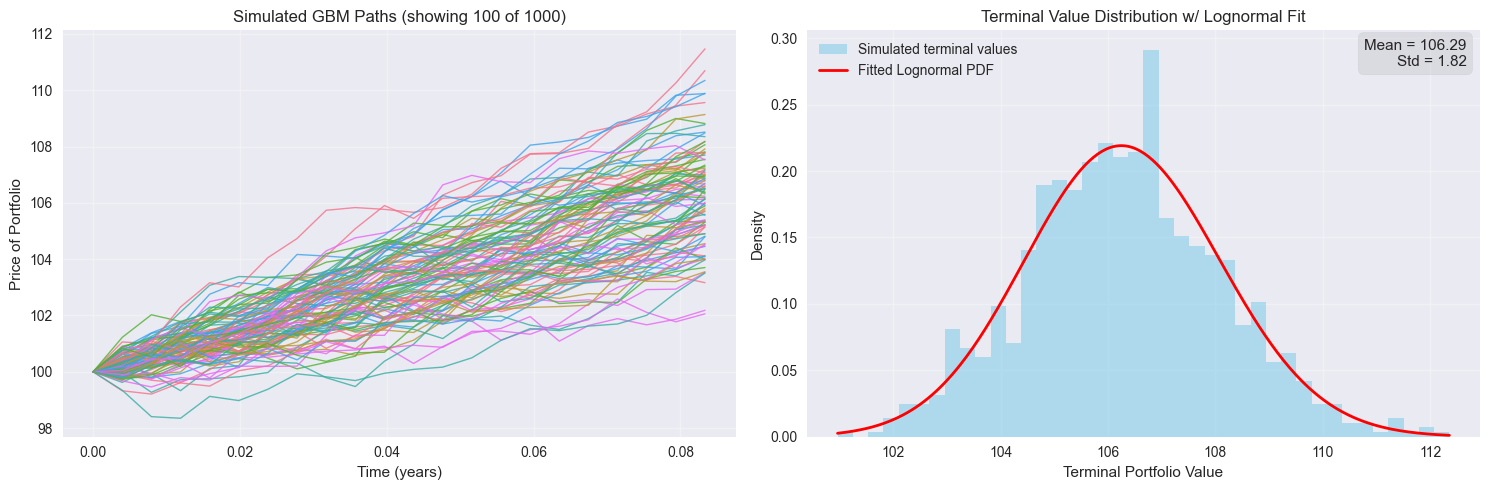

In [5]:
T = 1/12
N = int(T*252)
S0 = 100
dt = 1 / 252
M = 1000

sim_value = GBM_simulation(vol_annual=sigma_port*100,mu_annual=mu_port*100,S0=S0,T=T,N=N,M=M)